# Desarrollo de preguntas Blind Test

**Presentado por:** <br>
- Geoc. Juan Camilo Burgos Flórez
- Geoc. Luis Fernando Chacón 
- Geoc. Ing. Carlos Fabián Sánchez Suárez

-----

In [1]:
# Librerías a importar

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
# Establece la conexión con la base de datos y trae el archivo con la tabla de datos de producción

pd.options.display.float_format = '{:.2f}'.format      # Esta línea ajusta el formato a 2 decimales
engine = create_engine("sqlite:///HackathonSPE_BT.db")
sqlite_connection = engine.connect()                  

cnx = sqlite3.connect('HackathonSPE_BT.db')

In [3]:
c = cnx.cursor()
c.execute("UPDATE TablaProduccionBT SET Campo = REPLACE(Campo, ' ','' )")
cnx.commit()

-----

<strong> Pregunta 1: </strong> Caudal de producción del campo "1F D2689F", Julio 2019

In [4]:
query = "SELECT Campo, Produccion, Mes, Año FROM TablaProduccionBT\
                WHERE (Campo = '1f-d2689f' OR Campo = '1fd2689f' OR Campo = '1f d2689f') AND Año = 2019 AND Mes = 'Julio'\
                "

prodJulio = pd.read_sql_query(query, cnx)      # Producción en Julio 2019 del campo 1F D2689F
prodJulio["Caudal (BOPD)"] = prodJulio["Produccion"] / 31 # Como Julio tiene 31 días se realiza un cálculo para un caudal diario
Total = prodJulio["Caudal (BOPD)"].sum()

print("El caudal de producción de este campo durante Julio del 2019 fue de", round(Total,2), "BOPD")
prodJulio

El caudal de producción de este campo durante Julio del 2019 fue de 155.47 BOPD


,Campo,Produccion,Mes,Año,Caudal (BOPD)
0,1fd2689f,4766.24,Julio,2019,153.75
1,1fd2689f,53.18,Julio,2019,1.72


Text(0.5, 1.0, 'Producción de petróleo en el campo 1F D2689F en el 2019')

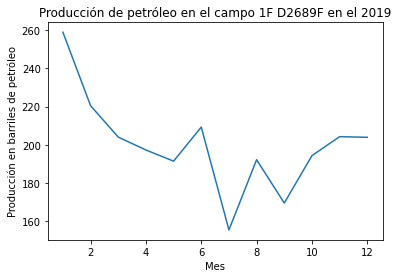

In [5]:
query00 = "SELECT Campo, sum(Produccion) as Produccion, Mes , Año FROM TablaProduccionBT\
                WHERE (Campo = '1f-d2689f' OR Campo = '1fd2689f' OR Campo = '1f d2689f') AND Año = 2019\
                GROUP BY Campo, Mes"

months = {"Enero":1, "Febrero":2, "Marzo":3, "Abril":4, "Mayo":5, "Junio":6, "Julio":7, "Agosto":8, "Septiembre":9,
         "Octubre":10, "Noviembre":11, "Diciembre":12}


pf0 =  pd.read_sql_query(query00, cnx).reset_index(drop=True)
pf0.index = pf0.index +1
pf0["Caudal (BOPD)"] = pf0["Produccion"] / 31   
pf0["Mes"] = pf0["Mes"].replace(months)
pf0 = pf0.sort_values(by="Mes")


plt.figure()
plt.plot(pf0["Mes"], pf0["Caudal (BOPD)"])
plt.xlabel('Mes')
plt.ylabel('Producción en barriles de petróleo')
plt.title('Producción de petróleo en el campo 1F D2689F en el 2019')


<strong> Respuesta: </strong> El campo "1F D2689F" produjo 4819.42 Barriles de petróleo durante el mes de julio de 2019; al ser julio un mes con 31 días, su caudal de producción fue de 155.47 Barriles por día (BOPD). Se realizó la gráfica comparativa a lo largo del año con su caudal de producción y se puede ver que en el mes de julio presentó una caida de su producción con respecto a los meses anteriores, y posterior a este mes, se presentaron aumentos. Este mes corresponde con un mínimo local, considerando para el tiempo del año 2019.

----

<strong>Pregunta 2: </strong> Barriles producidos por la operadora "2FE52430" en Febrero 2019

In [6]:
query1 ="SELECT Operadora, sum(Produccion) as Produccion, Mes, Año FROM TablaProduccionBT\
                WHERE Operadora = '2fe52430' AND Mes = 'Febrero' AND Año = 2019\
                GROUP BY Operadora"

prodFebrero = pd.read_sql_query(query1, cnx)      # Producción de la operadora "2FE52430"
prodFebrero


,Operadora,Produccion,Mes,Año
0,2fe52430,7452.22,Febrero,2019


Text(0.5, 1.0, 'Producción de petróleo la operadora 2FE52430 en el 2019')

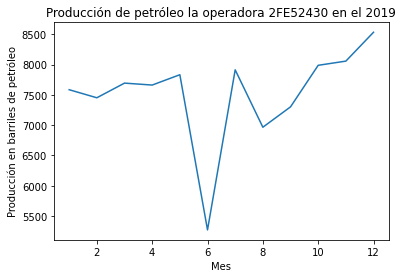

In [7]:
query11 = "SELECT Operadora, sum(Produccion) as Produccion, Mes, Año FROM TablaProduccionBT\
                WHERE Operadora = '2fe52430' AND Año = 2019\
                GROUP BY Mes"

prodFebrero1 = pd.read_sql_query(query11, cnx)      # Producción de la operadora "2FE52430"

months = {"Enero":1, "Febrero":2, "Marzo":3, "Abril":4, "Mayo":5, "Junio":6, "Julio":7, "Agosto":8, "Septiembre":9,
         "Octubre":10, "Noviembre":11, "Diciembre":12}

pf1 =  pd.read_sql_query(query11, cnx).reset_index(drop=True)
pf1.index = pf1.index +1
pf1["Mes"] = pf1["Mes"].replace(months)
pf1 = pf1.sort_values(by="Mes")


plt.figure()
plt.plot(pf1["Mes"], pf1["Produccion"])
plt.xlabel('Mes')
plt.ylabel('Producción en barriles de petróleo')
plt.title('Producción de petróleo la operadora 2FE52430 en el 2019')

<strong>Respuesta: </strong> Esta operadora produce de múltiples campos, la producción que se muestra corresponde con el acumulado de todos los campos en que se reportó producción. A modo de comparación se graficó la producción de esta empresa durante el año 2019, se observa que para el mes de febrero produjo 7542,22 barriles 

-----

<strong>Pregunta 3: </strong> Indique la producción departamental en barriles en el año 2018

,Departamento,Produccion,Año
0,cf33cb8a,623608.43,2018
1,f7fd2c4f,126069.17,2018
2,0fa93c9b,98767.67,2018


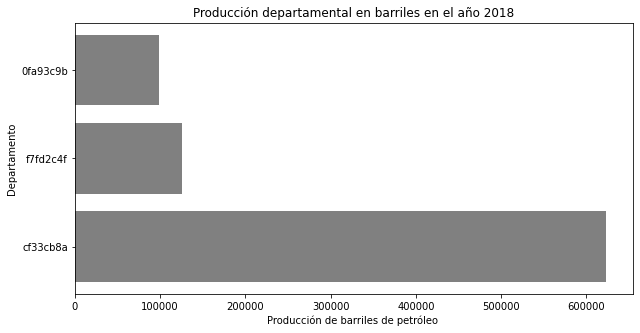

In [8]:
query2 ="SELECT Departamento, sum(Produccion) as Produccion, Año FROM TablaProduccionBT\
            WHERE Año = 2018\
            GROUP BY Departamento\
            ORDER BY Produccion DESC"

prodDepto = pd.read_sql_query(query2, cnx)      # La producción departamental en barriles en el año 2018

plt.figure(figsize=(10,5))
plt.barh(prodDepto["Departamento"], prodDepto["Produccion"], color ='grey')
plt.ylabel('Departamento')
plt.xlabel('Producción de barriles de petróleo ')
plt.title('Producción departamental en barriles en el año 2018')
prodDepto   

<strong>Respuesta: </strong> Se muestran los departamentos ordenados de mayor a menor producción anual reportada para el año 2018. A partir de ello se puede observar que el departamento que registra más producción corresponde al 'cf33cb8a' con más de 6 MMstb en el año 2018.

-----

<strong> Pregunta 4: </strong> ¿Cuáles son los departamentos con producción promedio por campo más variable?

In [9]:
query3= "SELECT Departamento, Campo, AVG(Produccion) as Produccion, Año FROM TablaProduccionBT\
                GROUP BY Departamento, Año, Campo"

prodCampo = pd.read_sql_query(query3, cnx)      # Producción promedio anual por campo
prodCampo['Campo'] = prodCampo['Campo'].replace(['1f-d2689f','1f d2689f'],'1fd2689f')    #Reemplaza el nombre del campo, es el mismo

prodCampo

,Departamento,Campo,Produccion,Año
0,0fa93c9b,373ebdec,888.39,2017
1,0fa93c9b,48670499,5131.89,2017
2,0fa93c9b,e32e23a1,927.68,2017
3,0fa93c9b,373ebdec,928.53,2018
4,0fa93c9b,48670499,6650.66,2018
...,...,...,...,...
110,f7fd2c4f,7eb34927,106.43,2019
111,f7fd2c4f,82edafb9,1851.29,2019
112,f7fd2c4f,8ba362f3,257.92,2019
113,f7fd2c4f,8dd7c41b,4714.70,2019


In [10]:
#Cálculo de la variabilidad promedio de producción por campo por departamento

campos_df= prodCampo.groupby(['Campo', 'Año', 'Departamento']).mean()   # Agrupación y promedio de producción anual
produc_anual=[]         # Se crea una lista vacia para agregar despues la diferencia de los promedio por campo

for i in range(1, len(campos_df)):                 
    if(campos_df.index.values[i-1][0] != campos_df.index.values[i][0]):                     # Se utiliza una condicion para que los campos no se repitan entre si
        min_camp= campos_df.loc[campos_df.index.values[i-1][0]]['Produccion'].min()         # Promedio más bajo por campo en tres años
        max_camp= campos_df.loc[campos_df.index.values[i-1][0]]['Produccion'].max()         # Promedia más alto por campo en tres años
        produc_anual.append([campos_df.index.values[i-1][2], campos_df.index.values[i-1][0], max_camp - min_camp])      # Se agrega la diferencia entre el mayor y menor promedio por campo, entrelazando el resultado al campo y al departamento
        product=pd.DataFrame(produc_anual)                                                  # Se crea el Dataframe de la diferencia promedio por campo
        product.columns=['Departamento','Campo','Variabilidad promedio'] # Se cambian los nombres de las columnas      
        product=product.sort_values(by=['Variabilidad promedio'], ascending=False, ignore_index=True)   # Se ordena el Dataframe en orden descendente de la variabilidad promedio de produccion por campo
        
product.head(10)     # Top 10 de las mayores variabilidades promedio, para ver todas remover el 10 del paréntesis y correr de nuevo

,Departamento,Campo,Variabilidad promedio
0,cf33cb8a,5559f8d7,4271.63
1,cf33cb8a,124207de,3721.58
2,cf33cb8a,fd6f6562,3160.06
3,cf33cb8a,1fd2689f,2685.68
4,f7fd2c4f,8dd7c41b,2425.93
5,cf33cb8a,2f614c0b,2321.12
6,f7fd2c4f,58a0d8ca,1576.64
7,0fa93c9b,48670499,1518.78
8,cf33cb8a,876a64fe,1263.14
9,cf33cb8a,c728bf96,1181.18


Text(0.5, 1.0, 'Promedio de las variabilidades de la producción por cada departamento en el año 2018')

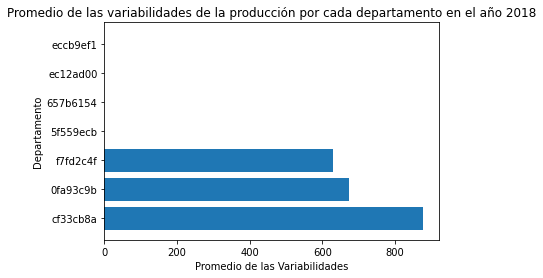

In [11]:
# Promedios de las variabilidades y representación gráfica

pr = product.groupby("Departamento").mean().sort_values(by="Variabilidad promedio", ascending =False).reset_index()

plt.figure()
plt.barh(pr["Departamento"], pr["Variabilidad promedio"])
plt.xlabel('Promedio de las Variabilidades')
plt.ylabel('Departamento')
plt.title('Promedio de las variabilidades de la producción por cada departamento en el año 2018')

<strong>Respuesta: </strong> Para conocer la variabilidad de la producción promedio por campo en cada departamento se procedió por calcular el rango entre los valores máximo y mímimo de la producción reportada por campo y por departamento, entre los tres años en cuestión (2017 a 2019). Con este resultado se construyó la tabla anterior, donde la variabilidad promedio en la producción por campo tiene un mayor valor en el departamento 'cf33cb8a' para el campo '5559f8d7' con un valor de 4271.63 Barriles de petróleo. Este mismo departamento reporta 7 de las 10 mayores variabilidades en los diferentes campos del país.

-----

<strong>Pregunta 5: </strong> ¿Cuál es la tasa de declinación promedio mensual (Arps, hiperbólica, b = 0.5) del campo "51CBB05D"?

In [12]:
# Cálculo de la declinación promedio mensual con la función hiperbólica

df_produccionbt = pd.read_sql_query("SELECT * FROM TablaProduccionBT", cnx, index_col = "index")

def decl_hiperbolica(df):
    campo='51cbb05d'
    años=[2017,2018,2019]
    meses=['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
    valores=[]
    for año in años:
        for mes in meses:
            valor=df[(df['Campo']==campo) & (df['Año']==año) & (df['Mes']==mes)]['Produccion'].sum()
            valores.append([campo,año,mes,valor])
        df_año=pd.DataFrame(valores)
        df_año.columns=['campo','año','mes','produccion mensual']
  
    b=0.5
    tiempo=np.linspace(1,36,36)            # Tiempo en meses
    hiperbolica=[]                         # lista para agregar los valores de declinacion hiperbolica
    for t,prod in zip(tiempo, df_año['produccion mensual']):
        declinacion=(prod/t)/(1+(1/t)*b*t)**(1/b)     # Fórmula de la declinación Hiperbólica (Arps)
        hiperbolica.append(declinacion)

    df_año['Declinacion mensual']= hiperbolica
    return df_año

print('La tasa de declinacion promedio mensual del campo 51cbb05d es de: '
      + str(round(decl_hiperbolica(df_produccionbt)['Declinacion mensual'].mean(),2)) + ' barriles por mes')

(decl_hiperbolica(df_produccionbt)).head(10) # 10 primeros datos de la declinación, para ver todos remover el 10

La tasa de declinacion promedio mensual del campo 51cbb05d es de: 56.29 barriles por mes


,campo,año,mes,produccion mensual,Declinacion mensual
0,51cbb05d,2017,Enero,1871.49,831.77
1,51cbb05d,2017,Febrero,1412.30,313.85
2,51cbb05d,2017,Marzo,1003.13,148.61
3,51cbb05d,2017,Abril,1017.90,113.10
4,51cbb05d,2017,Mayo,789.85,70.21
5,51cbb05d,2017,Junio,646.10,47.86
6,51cbb05d,2017,Julio,978.82,62.15
7,51cbb05d,2017,Agosto,836.36,46.46
8,51cbb05d,2017,Septiembre,797.87,39.40
9,51cbb05d,2017,Octubre,703.38,31.26


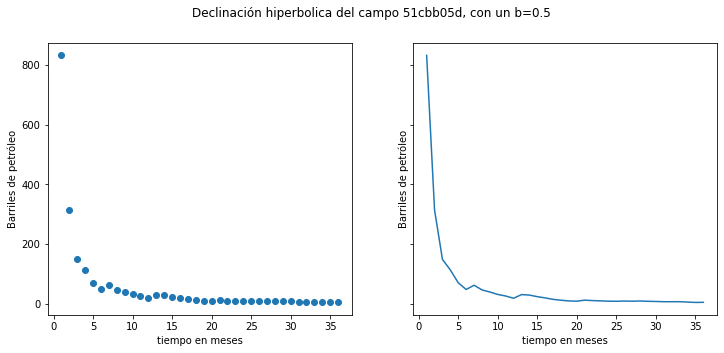

In [13]:
# Gráfica que representa la declinación hiperbólica del campo

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axs[0].scatter(np.linspace(1,36,36),decl_hiperbolica(df_produccionbt)['Declinacion mensual'])
axs[1].plot(np.linspace(1,36,36),decl_hiperbolica(df_produccionbt)['Declinacion mensual'])
axs[0].set_ylabel('Barriles de petróleo')
axs[1].set_ylabel('Barriles de petróleo')
axs[0].set_xlabel('tiempo en meses')
axs[1].set_xlabel('tiempo en meses')
fig.suptitle('Declinación hiperbolica del campo 51cbb05d, con un b=0.5')
plt.show()

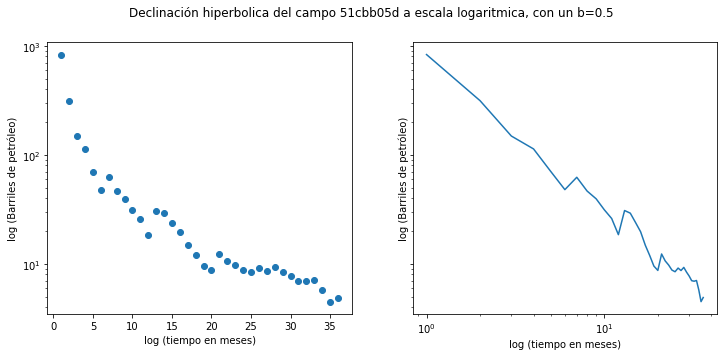

In [14]:
# Gráfica que representa la declinación hiperbólica del campo en escala logarítmica

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
axs[0].scatter(np.linspace(1,36,36),decl_hiperbolica(df_produccionbt)['Declinacion mensual'])
axs[1].plot(np.linspace(1,36,36),decl_hiperbolica(df_produccionbt)['Declinacion mensual'])
axs[0].set_ylabel('log (Barriles de petróleo)')
axs[1].set_ylabel('log (Barriles de petróleo)')
axs[0].set_xlabel('log (tiempo en meses)')
axs[1].set_xlabel('log (tiempo en meses)')
fig.suptitle('Declinación hiperbolica del campo 51cbb05d a escala logaritmica, con un b=0.5')
plt.xscale('log')
plt.yscale('log')
plt.show()

<strong> Respuesta: </strong> <br>La declinación hiperbólica promedio mensual para el campo '51CBB05D' es de 56.29 barriles por mes, con un exponente de declinación b = 0.5 y con los datos obtenidos. Se utilizó el método de Arps con la ecuación hiperbólica (Fuente: Tesis "Análisis Moderno de la Declinación de la Producción de Hidrocarburos" de Alberto Armenta Moreno, 2019). A partir del análisis de esa curva, se puede apreciar que el campo tiene una declinación alta, pues rápidamente adquiere su punto de estabilidad en declinación, al cabo de aproximadamente 5 meses, donde pasa de tener una producción por encima de los 800 barriles de petróleo a menos de 200 barriles en este periodo de tiempo. <br>
<br> La gráfica logarítmica se realizó para comprobar que la tendencia se ajustara a una tendencia lineal, se puede ver que, salvo por algunos valores, la gráfica trata de ajustarse a una linea recta en tendencia de pendiente negativa. <br>